# Homework nr. 2 - data cleaning (deadline 8/11/2018)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in details: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can. ;)

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  2. Check consistency of at least three features where you expect problems (include "Object Name" feature).
  3. Select some features where you expect integrity problems (describe your choice) and check integrity of those features.
  4. Convert at least five features to a proper data type. Choose at least one numeric, one categorical and one datetime.
  5. Find some outliers (describe your selection criteria).
  6. Detect missing data in at least three features, convert them to a proper representation (if they are already not), and impute missing values in at least one feature.

**If you do all this properly, you will obtain 6 points**

To earn **extra two points** you can do some of these:
  * Focus more precisely on cleaning of the "Medium" feature. Such if you like to use it in KNN based algorithms later.
  * Focus on the extraction of physical dimensions of each item (width, depth and height in centimeters) from the "Dimensions" feature.

## Comments

  * Please follow the instructions from https://courses.fit.cvut.cz/MI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, he can give you another chance to rework your homework and to obtain more points.

### Answers

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("MetObjects.csv")

In [5]:
#Simply checking the data we have in the MetObjects CSV
data.info()

#Looking at how many unique elements we have per column.
display(data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490325 entries, 0 to 490324
Data columns (total 43 columns):
Object Number              490325 non-null object
Is Highlight               490325 non-null bool
Is Public Domain           490325 non-null bool
Object ID                  490325 non-null int64
Department                 490325 non-null object
Object Name                486173 non-null object
Title                      459242 non-null object
Culture                    208797 non-null object
Period                     89387 non-null object
Dynasty                    23286 non-null object
Reign                      11204 non-null object
Portfolio                  21944 non-null object
Artist Role                282424 non-null object
Artist Prefix              97817 non-null object
Artist Display Name        284520 non-null object
Artist Display Bio         236082 non-null object
Artist Suffix              11652 non-null object
Artist Alpha Sort          284487 non-null object


Object Number              487647
Is Highlight                    2
Is Public Domain                2
Object ID                  490325
Department                     19
Object Name                 28187
Title                      248036
Culture                      7224
Period                       1794
Dynasty                       379
Reign                         379
Portfolio                    3200
Artist Role                  6277
Artist Prefix                5554
Artist Display Name         61370
Artist Display Bio          45245
Artist Suffix                1747
Artist Alpha Sort           61373
Artist Nationality           3806
Artist Begin Date           24017
Artist End Date             24351
Object Date                 32566
Object Begin Date            2103
Object End Date              2079
Medium                      64711
Dimensions                 254865
Credit Line                 38830
Geography Type                133
City                         2665
State         

### 2) Data consistency of Object Name, Country, Object Begin Date

In [6]:
#We are going to check the consistency of these three features

display(data['Object Name'].unique())
display(data['Country'].unique())
display(data['Object Begin Date'].unique())

array(['Coin', 'Peso', 'Centavos', ..., 'N/A.', 'biface',
       'Wedjat eye bead'], dtype=object)

array([nan, 'Mexico', 'Guatemala', ..., 'present-day Kirghiztan',
       'Northwest Iran', 'Germanay'], dtype=object)

array([1853, 1901, 1909, ..., 2017, -955, 2018])

In [29]:
#Before diving into precise details about the inconsistencies in each feature, we can start by taking a look at the percentage of NAs in each of them.
#This is a first in knowing how consistent our data is.

nas_oname = data['Object Name'].isna().sum()
nas_country = data['Country'].isna().sum()
nas_obdate = data['Object Begin Date'].isna().sum()

val_oname = len(data['Object Name'])
val_country = len(data['Country'])
val_obdate = len(data['Object Begin Date'])

print("The percentage of NAs for the feature Object Name is : ", (nas_oname/val_oname)*100, "%")
print("The percentage of NAs for the feature Country is : ", (nas_country/val_country)*100, "%")
print("The percentage of NAs for the feature Object Begin Date is : ", (nas_obdate/val_obdate)*100, "%")

The percentage of NAs for the feature Object Name is :  0.846785295467292 %
The percentage of NAs for the feature Country is :  84.3650639881711 %
The percentage of NAs for the feature Object Begin Date is :  0.0 %


In [35]:
# Regarding the Object Name feature we can see that the data is pretty consistent NA wise, since less than 1% are NAs.
# Now we should look further at the values themselves.
# Because the "Object Name" is supposed to be of string type, what can be interesting is to check the typo, meaning if there is a difference between the number of unique values in their original form, and when they are all lower cased.
# We are expecting to see less unique values when they are lower cased.

oname_norm = len(data['Object Name'].unique())
oname_low = len(data['Object Name'].str.lower().unique())

print("The number of unique values, when they are not lower cased is : ", oname_norm)
print("The number of unique values, when they are not lower cased is : ", oname_low)

#Eventhough not a lot of data is missing we can say that there is quite a bit of an issue typo wise for this feature.

The number of unique values, when they are not lower cased is :  28188
The number of unique values, when they are not lower cased is :  27403


In [40]:
# Regarding the Country feature, we can see that the data is not really consistent NA wise, due to the fact that more than 84% of them are missing.
# But we can still check the consistency of this feature in the same fashion that we did with the Object Name since their data type are similar. 

country_norm = len(data['Country'].unique())
country_low = len(data['Country'].str.lower().unique())

print("The number of unique values, when they are not lower cased is : ", country_norm)
print("The number of unique values, when they are not lower cased is : ", country_low)

# Eventhough a lot of data is missing, we can say that the typo is pretty consistent since the difference between the lower casing and the none lower casing isn't that much

The number of unique values, when they are not lower cased is :  1098
The number of unique values, when they are not lower cased is :  1078


In [39]:
# Regarding the Object Begin Date feature, there isn't any missing values. 
# But, by quickly checking the different values of Object Begin Date, we can see that there are negative values, which is not normal.
# The following line shows that indeed, there are a lot of negative values.

obdate_neg = data['Object Begin Date'].lt(0).sum()

print("The number of negative values for the Object Begin Date feature is : ", obdate_neg)
print("This represents : ", (obdate_neg/val_obdate)*100, "% of values.") 

# So there is definitely adjustment that can be made regarding this feature.

The number of negative values for the Object Begin Date feature is :  67045
This represents :  13.67358384744812 % of values.


### 3) Data integrity of : Geography, Artist End Date, Object End Date

In [18]:
# The first feature that will be subject to our integrity check is : Geography. 
# We can see that there are sometimes, multiple values corresponding to a country (i.e Possibly made in | Possible made in; country : France | England)
# We want to check if the number of values in Geography, is corresponding to number of values in Country.
# In order to do this, we will create two lists, where there will be the number of values per row of each feature and finally sum the number of differences.

# Splitting the data and retrieving the number of values per row for the Geography feature.
geo_split = data['Geography Type'].str.split("|")

list_geo = []
for i in geo_split:
    try:
        list_geo.append(len(i))
    except TypeError:
        list_geo.append(0)
        
# Splitting the data and retrieving the number of values per row for the Country feature.
country_split = data['Country'].str.split("|")
list_country = []

for i in country_split:
    try:
        list_country.append(len(i))
    except TypeError:
        list_country.append(0)

# Creating a difference count
difference = 0

for i in list_geo:
    if(list_geo[i] != list_country[i]):
        difference = difference + 1
        
print("The number of values in the Geography feature matches the number of values in Country, because the difference count is : ", difference)

# The difference count is 0, so we can say that there is no integrity issues with the Geography feature (according to what were looking for)

The number of values in the Geography feature matches the number of values in Country, because the difference count is :  0


In [36]:
# Integrity between the Artist End Date and the Artist Begin Date.
# Here we simply to check if the Artist End Date isn't lower than the Artist Begin Date.
# If in some cases we find that some the Artist End Date are lower than their Begin Date then there is an integrity problem. 

artist_date_diff = (data['Artist End Date'] < data['Artist Begin Date'])

artist_date_result = []
for y in artist_date_diff.value_counts():
    artist_date_result.append(y)
    
print("There are", artist_date_result[1], "rows where the Artist End Date is lower than its Begin Date.")

# According to this result we can say that there is an integrity problem with this feature

There are 163 rows where the Artist End Date is lower than its Begin Date.


In [45]:
# Integrity between the Object End Date and the Object Begin Date.
# Here we simply to check if the Object End Date isn't lower than the Object Begin Date.
# If in some cases we find that some the Object End Date are lower than their Begin Date then there is an integrity problem. 

artist_date_diff = (data['Object End Date'] < data['Object Begin Date'])

artist_date_result = []
for y in artist_date_diff.value_counts():
    artist_date_result.append(y)
    
print("There are", artist_date_result[1], "rows where the Object End Date is lower than its Begin Date.")

# According to this result we can say that there is an integrity problem with this feature

There are 198 rows where the Object End Date is lower than its Begin Date.


### 4) Convert at least five features to a proper data type. Choose at least one numeric, one categorical and one datetime : 

- Numerical conversion : Object ID, Artist Begin Date
- Categorical conversion : Artist Role, Medium
- Datetime converson : Metadata Date

In [106]:
# First of all the numerical conversion of the Object ID and Artist Begin date feature
data['Object ID'] = pd.to_numeric(data['Object ID'])
data['Artist Begin Date'] = pd.to_numeric(data['Object Begin Date'])

# Now lets convert Artist Role and Medium features to categories
data['Artist Role'] = data['Artist Role'].astype('category')
data['Medium'] = data['Medium'].astype('category')

# Finally lets convert the Metadata Date to datetime
data['Metadata Date'] = pd.to_datetime(data['Metadata Date'])
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490325 entries, 0 to 490324
Data columns (total 43 columns):
Object Number              490325 non-null object
Is Highlight               490325 non-null bool
Is Public Domain           490325 non-null bool
Object ID                  490325 non-null int64
Department                 490325 non-null object
Object Name                486173 non-null object
Title                      459242 non-null object
Culture                    208797 non-null object
Period                     89387 non-null object
Dynasty                    23286 non-null object
Reign                      11204 non-null object
Portfolio                  21944 non-null object
Artist Role                282424 non-null category
Artist Prefix              97817 non-null object
Artist Display Name        284520 non-null object
Artist Display Bio         236082 non-null object
Artist Suffix              11652 non-null object
Artist Alpha Sort          284487 non-null objec

None

### 5) Find some outliers (describe your selection criteria).

In [31]:
# First of all lets look at a description of our dataframe.

display(data.describe())

# As we can see in the description of the dataframe, the max in Object Begin Date, Artist Begin Date and Object End date especially, is way over the 75 percentile of values.
# Therefore there are defintely outliers in these features.

,Object ID,Artist Begin Date,Object Begin Date,Object End Date
count,490325.000000,490325.000000,490325.000000,490325.000000
mean,383332.828189,1308.275103,1308.275103,1407.464255
std,229400.524656,1658.584983,1658.584983,1152.647534
min,1.000000,-400000.000000,-400000.000000,-240000.000000
25%,212141.000000,1535.000000,1535.000000,1593.000000
50%,373207.000000,1800.000000,1800.000000,1845.000000
75%,561704.000000,1900.000000,1900.000000,1911.000000
max,820150.000000,5000.000000,5000.000000,157555.000000


0.0005399999999999849


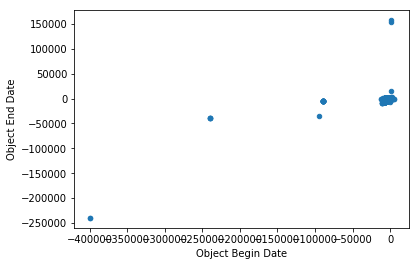

In [45]:
# Now lets plot a graph to verify this visually for the Object Begin Date and End Date

data.plot.scatter(x='Object Begin Date', y='Object End Date')

# This confirms our assumptions.
# Now lets see how many outliers are for each of the above mentioned features.

In [70]:
# We can use the quartile calculations to identify how many outliers there are for one feature.

obdate = data['Object Begin Date']

Q1 = data['Object Begin Date'].quantile(0.25)
Q3 = data['Object Begin Date'].quantile(0.75)
IQR = Q3 - Q1

outliers = ((obdate < (Q1 - 1.5 * IQR)) | (obdate > (Q3 + 1.5 * IQR))).sum()

print("There are ", outliers, " outliers for the feature Object Begin Date.")
print("This represents about", round((outliers/len(obdate)*100), 2), "% of values.")

There are  90821  outliers for the feature Object Begin Date.
This represents about 18.52 % of values.


### 6) Detect missing data in at least three features, convert them to a proper representation (if they are already not), and impute missing values in at least one feature.

In [89]:
# Here we will focus on Culture, Geogaphy Type and Period features.

# Lets see how many NAs there are in each of these features.
nas_culture = data['Culture'].isna().sum()
nas_gtype = data['Geography Type'].isna().sum()
nas_obdate = data['Object Date'].isna().sum()

print("There are,", nas_culture, "missing values in the Culture feature.")
print("There are,", nas_gtype, "missing values in the Geography Type feature.")
print("There are,", nas_obdate, "missing values in the Object Date feature.")

There are, 281528 missing values in the Culture feature.
There are, 430095 missing values in the Geography Type feature.
There are, 15067 missing values in the Object Date feature.


In [119]:
# Now lets convert them to a proper type.

data['Culture'] = data['Culture'].astype('category')
data['Geography Type'] = data['Geography Type'].astype('category')
data['Period'] = data['Period'].astype('category')


display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490325 entries, 0 to 490324
Data columns (total 43 columns):
Object Number              490325 non-null object
Is Highlight               490325 non-null bool
Is Public Domain           490325 non-null bool
Object ID                  490325 non-null int64
Department                 490325 non-null object
Object Name                486173 non-null object
Title                      459242 non-null object
Culture                    208797 non-null category
Period                     89387 non-null category
Dynasty                    23286 non-null object
Reign                      11204 non-null object
Portfolio                  21944 non-null object
Artist Role                282424 non-null object
Artist Prefix              97817 non-null object
Artist Display Name        284520 non-null object
Artist Display Bio         236082 non-null object
Artist Suffix              11652 non-null object
Artist Alpha Sort          284487 non-null obj

None

In [120]:
# Now lets add values to the Obejct Date feature using Obejct Begin Date and End Date.

data['Object Date'].fillna(data['Object Begin Date'].map(str) + '-' + data['Object End Date'].map(str), inplace = True)

nas_obdate = data['Object Date'].isna().sum()
print("There are,", nas_obdate, "missing values in the Object Date feature.")

There are, 0 missing values in the Object Date feature.
